In [1]:
path = '../phd-model-process/'

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import scipy as sp
import scipy.stats as st


from helpers_pd import *

# Plotting
import seaborn as sns
sns.set()
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
# sns.set(style="darkgrid")
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')

In [2]:
df = get_data(gen="Gen10")
df["Gen"] = "Gen10"

df['Name'] = df['Gen'] + "/" + df.index
df = df.set_index('Name')

In [3]:
len(df)

3270

In [4]:
df['k_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']

In [5]:
dfs_all = df[['Model', "Gen",
          'dt_50_ref',
          'dt_50_ab',
          'k_d',
          'k_oc',
          'epsilon_iso',
          'KGE-CONC-blk','KGE-d13C-blk',
          'KGE-CONC-tra','KGE-d13C-tra',
          'KGE-CONC-det','KGE-d13C-det',
          'KGE-CONC_out', 'KGE-d13C_out',
          'KGE-Q_out'
          ]]

In [6]:
gen1x = dfs_all.loc[(dfs_all['Gen'] == 'Gen10')]

# dfs_nc = gen1x.loc[(gen1x['Model'] == 'fix') | (gen1x['Model'] == 'var')]
# dfs_nc = gen1x.loc[(gen1x['Model'] == 'fix')]
dfs_nc = gen1x.loc[(gen1x['Model'] == 'var')]
dfs_wc = gen1x.loc[(gen1x['Model'] == 'var')]

In [7]:
# blk_nc = dfs_nc.loc[(dfs_nc['KGE-CONC-blk'] > .5) & (dfs_nc['KGE-d13C-blk'] >  0.0) & (dfs_nc['KGE-Q_out'] >  0.50)]
# blk_wc = dfs_wc.loc[(dfs_wc['KGE-CONC-blk'] > .5) & (dfs_wc['KGE-d13C-blk'] >  0.82) & (dfs_wc['KGE-Q_out'] >  0.50)]

blk_nc = dfs_nc.loc[(dfs_nc['KGE-CONC-blk'] > .5) & (dfs_nc['KGE-d13C-blk'] >  -5.0) & (dfs_nc['KGE-Q_out'] >  0.545)]
blk_wc = dfs_wc.loc[(dfs_wc['KGE-CONC-blk'] > .5) & (dfs_wc['KGE-d13C-blk'] >  0.9) & (dfs_wc['KGE-Q_out'] >  0.545)]

In [8]:
blk_wc[['epsilon_iso']].mean()

epsilon_iso    2.549664
dtype: float64

In [9]:
nc = blk_nc.index.tolist() #[0]
wc = blk_wc.index.tolist() #[0]
print(len(nc), len(wc))

(219, 10)


In [10]:
nc_deg = get_sets_metrics(nc, path, "resM_accDEGz0.tss", "DEG")
wc_deg = get_sets_metrics(wc, path, "resM_accDEGz0.tss", "DEG")

nc_per = get_sets_metrics(nc, path, "resM_light_real_z0.tss", "PER")
wc_per = get_sets_metrics(wc, path, "resM_light_real_z0.tss", "PER")

nc_exp = get_sets_metrics(nc, path, "resM_EXP_light_g.tss", "EXP")
wc_exp = get_sets_metrics(wc, path, "resM_EXP_light_g.tss", "EXP")

nc_lch = get_sets_metrics(nc, path, "resM_accLCHz0.tss", "LCH")
wc_lch = get_sets_metrics(wc, path, "resM_accLCHz0.tss", "LCH")

nc_age = get_sets_metrics(nc, path, "resM_accAGED_DEGz0.tss", "AGE")
wc_age = get_sets_metrics(wc, path, "resM_accAGED_DEGz0.tss", "AGE")

nc_vol = get_sets_metrics(nc, path, "resM_accVOLATz0.tss", "VOL")
wc_vol = get_sets_metrics(wc, path, "resM_accVOLATz0.tss", "VOL")

In [11]:
metrics = ['DEG', 'PER', 'EXP', 'LCH', 'AGE', 'VOL']
nc_stat = [get_stats_df(nc_deg), get_stats_df(nc_per), 
           get_stats_df(nc_exp), get_stats_df(nc_lch), 
           get_stats_df(nc_age), get_stats_df(nc_vol)]

wc_stat = [get_stats_df(wc_deg), get_stats_df(wc_per), 
           get_stats_df(wc_exp), get_stats_df(wc_lch),
           get_stats_df(wc_age), get_stats_df(wc_vol)]

In [12]:
print(len(nc_stat[0]), len(wc_stat[0]))

(121, 121)


# Cumulative applied mass (grams)

All data frames have this time series, and does not change

In [13]:
# WC
app = pd.read_table(path + wc[0] + "resM_accAPP.tss", 
                   skiprows=4, delim_whitespace=True,
                                names=['Jdays', 'app'],
                                header=None)
app['Capp'] = app['app'].cumsum()

In [14]:
label_nc = 'NC'
label_wc = 'WC'

top="high"
bottom="low"

deg =  [pct_df(nc_stat[0], 'DEG', app, cst=label_nc , high=top, low=bottom),
        pct_df(wc_stat[0], 'DEG', app, cst=label_wc, high=top, low=bottom)]

deg_all = pd.concat(deg) 

per =  [pct_df(nc_stat[1], 'PER', app, cst=label_nc , high=top, low=bottom),
        pct_df(wc_stat[1], 'PER', app, cst=label_wc, high=top, low=bottom)]

per_all = pd.concat(per) 

exp =  [pct_df(nc_stat[2], 'EXP', app, cst=label_nc , high=top, low=bottom),
        pct_df(wc_stat[2], 'EXP', app, cst=label_wc, high=top, low=bottom)]

exp_all = pd.concat(exp) 

lch =  [pct_df(nc_stat[3], 'LCH', app, cst=label_nc , high=top, low=bottom),
        pct_df(wc_stat[3], 'LCH', app, cst=label_wc, high=top, low=bottom)]

lch_all = pd.concat(lch)

age =  [pct_df(nc_stat[4], 'AGE', app, cst=label_nc , high=top, low=bottom),
        pct_df(wc_stat[4], 'AGE', app, cst=label_wc, high=top, low=bottom)]

age_all = pd.concat(age)

vol =  [pct_df(nc_stat[5], 'VOL', app, cst=label_nc , high=top, low=bottom),
        pct_df(wc_stat[5], 'VOL', app, cst=label_wc, high=top, low=bottom)]

vol_all = pd.concat(vol)

In [15]:
print(len(per[0]), len(vol[1]))

(348, 348)


## Get arrays for fill_between()

In [16]:
time = np.asarray(deg_all.loc[(deg_all['variable']=="DEG_95%") & (deg_all['Type'] == label_wc)]['Jdays'])
print(len(time)) # time[0:5]

116


In [17]:
# print(deg_max_wc[-1], deg_min_wc[-1], deg_ave_wc[-1])
# print(deg_max_wc[-1] - deg_ave_wc[-1])
# print(deg_ave_wc[-1] - deg_min_wc[-1])

In [18]:
# Deg
deg_max_wc = np.asarray(deg_all.loc[(deg_all['variable']=="DEG_95%") & (deg_all['Type'] == label_wc)]['value'])
deg_min_wc = np.asarray(deg_all.loc[(deg_all['variable']=="DEG_05%") & (deg_all['Type'] == label_wc)]['value'])
deg_ave_wc = np.asarray(deg_all.loc[(deg_all['variable']=="DEG_50%") & (deg_all['Type'] == label_wc)]['value'])

deg_max_nc = np.asarray(deg_all.loc[(deg_all['variable']=="DEG_95%") & (deg_all['Type'] == label_nc)]['value'])
deg_min_nc = np.asarray(deg_all.loc[(deg_all['variable']=="DEG_05%") & (deg_all['Type'] == label_nc)]['value'])
deg_ave_nc = np.asarray(deg_all.loc[(deg_all['variable']=="DEG_50%") & (deg_all['Type'] == label_nc)]['value'])

# Per
per_max_wc = np.asarray(per_all.loc[(per_all['variable']=="PER_95%") & (per_all['Type'] == label_wc)]['value'])
per_min_wc = np.asarray(per_all.loc[(per_all['variable']=="PER_05%") & (per_all['Type'] == label_wc)]['value'])
per_ave_wc = np.asarray(per_all.loc[(per_all['variable']=="PER_50%") & (per_all['Type'] == label_wc)]['value'])

per_max_nc = np.asarray(per_all.loc[(per_all['variable']=="PER_95%") & (per_all['Type'] == label_nc)]['value'])
per_min_nc = np.asarray(per_all.loc[(per_all['variable']=="PER_05%") & (per_all['Type'] == label_nc)]['value'])
per_ave_nc = np.asarray(per_all.loc[(per_all['variable']=="PER_50%") & (per_all['Type'] == label_nc)]['value'])

# Exp
exp_max_wc = np.asarray(exp_all.loc[(exp_all['variable']=="EXP_95%") & (exp_all['Type'] == label_wc)]['value'])
exp_min_wc = np.asarray(exp_all.loc[(exp_all['variable']=="EXP_05%") & (exp_all['Type'] == label_wc)]['value'])
exp_ave_wc = np.asarray(exp_all.loc[(exp_all['variable']=="EXP_50%") & (exp_all['Type'] == label_wc)]['value'])

exp_max_nc = np.asarray(exp_all.loc[(exp_all['variable']=="EXP_95%") & (exp_all['Type'] == label_nc)]['value'])
exp_min_nc = np.asarray(exp_all.loc[(exp_all['variable']=="EXP_05%") & (exp_all['Type'] == label_nc)]['value'])
exp_ave_nc = np.asarray(exp_all.loc[(exp_all['variable']=="EXP_50%") & (exp_all['Type'] == label_nc)]['value'])

# LCH
lch_max_wc = np.asarray(lch_all.loc[(lch_all['variable']=="LCH_95%") & (lch_all['Type'] == label_wc)]['value'])
lch_min_wc = np.asarray(lch_all.loc[(lch_all['variable']=="LCH_05%") & (lch_all['Type'] == label_wc)]['value'])
lch_ave_wc = np.asarray(lch_all.loc[(lch_all['variable']=="LCH_50%") & (lch_all['Type'] == label_wc)]['value'])

lch_max_nc = np.asarray(lch_all.loc[(lch_all['variable']=="LCH_95%") & (lch_all['Type'] == label_nc)]['value'])
lch_min_nc = np.asarray(lch_all.loc[(lch_all['variable']=="LCH_05%") & (lch_all['Type'] == label_nc)]['value'])
lch_ave_nc = np.asarray(lch_all.loc[(lch_all['variable']=="LCH_50%") & (lch_all['Type'] == label_nc)]['value'])

# Age
age_max_wc = np.asarray(age_all.loc[(age_all['variable']=="AGE_95%") & (age_all['Type'] == label_wc)]['value'])
age_min_wc = np.asarray(age_all.loc[(age_all['variable']=="AGE_05%") & (age_all['Type'] == label_wc)]['value'])
age_ave_wc = np.asarray(age_all.loc[(age_all['variable']=="AGE_50%") & (age_all['Type'] == label_wc)]['value'])

age_max_nc = np.asarray(age_all.loc[(age_all['variable']=="AGE_95%") & (age_all['Type'] == label_nc)]['value'])
age_min_nc = np.asarray(age_all.loc[(age_all['variable']=="AGE_05%") & (age_all['Type'] == label_nc)]['value'])
age_ave_nc = np.asarray(age_all.loc[(age_all['variable']=="AGE_50%") & (age_all['Type'] == label_nc)]['value'])

# Vol
vol_max_wc = np.asarray(vol_all.loc[(vol_all['variable']=="VOL_95%") & (vol_all['Type'] == label_wc)]['value'])
vol_min_wc = np.asarray(vol_all.loc[(vol_all['variable']=="VOL_05%") & (vol_all['Type'] == label_wc)]['value'])
vol_ave_wc = np.asarray(vol_all.loc[(vol_all['variable']=="VOL_50%") & (vol_all['Type'] == label_wc)]['value'])

vol_max_nc = np.asarray(vol_all.loc[(vol_all['variable']=="VOL_95%") & (vol_all['Type'] == label_nc)]['value'])
vol_min_nc = np.asarray(vol_all.loc[(vol_all['variable']=="VOL_05%") & (vol_all['Type'] == label_nc)]['value'])
vol_ave_nc = np.asarray(vol_all.loc[(vol_all['variable']=="VOL_50%") & (vol_all['Type'] == label_nc)]['value'])

In [19]:
deg_all.loc[(deg_all['variable']=="DEG_50%") & (deg_all['Type'] == label_nc)]['value'][30:39]

146    40.766706
147    42.381387
148    43.841891
149    45.173584
150    46.450245
151    47.659455
152    48.997761
153    50.251628
154    51.354762
Name: value, dtype: float64

In [20]:
# Mean
deg_end_wc = deg_ave_wc[-1]
deg_end_nc = deg_ave_nc[-1]

per_end_wc = per_ave_wc[-1] 
per_end_nc = per_ave_nc[-1] 

exp_end_wc = exp_ave_wc[-1]
exp_end_nc = exp_ave_nc[-1]

lch_end_wc = lch_ave_wc[-1]
lch_end_nc = lch_ave_nc[-1]

age_end_wc = age_ave_wc[-1]
age_end_nc = age_ave_nc[-1]

vol_end_wc = vol_ave_wc[-1]
vol_end_nc = vol_ave_nc[-1]

# CI 
deg_ci_wc = deg_end_wc - deg_min_wc[-1]
deg_ci_nc = deg_end_nc - deg_min_nc[-1]

per_ci_wc = per_max_wc[-1] - per_end_wc 
per_ci_nc = per_max_nc[-1] - per_end_nc  

exp_ci_wc = exp_max_wc[-1] - exp_end_wc
exp_ci_nc = exp_max_nc[-1] - exp_end_nc

lch_ci_wc = lch_max_wc[-1] - lch_end_wc
lch_ci_nc = lch_max_nc[-1] - lch_end_wc

age_ci_wc = age_max_wc[-1] - age_end_wc
age_ci_nc = age_max_nc[-1] - age_end_nc

vol_ci_wc = vol_max_wc[-1] - vol_end_wc
vol_ci_nc = vol_max_nc[-1] - vol_end_nc


In [40]:
# Extrapolated Observations
met = pd.read_csv(path + "observations/Metrics_R.csv")
# met.tail(40)
met.tail(2)

,DayMoYr,Days,totMass,PrctExp,PrctExpMin,PrctExpMax,PrcRem,PrcRemMin,PrcRemMax,Blab,Bmin,Bmax,Bmod
114,2016-07-11,114,29130.58386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,2016-07-12,115,29130.58386,NaN,NaN,NaN,17.702126,15.046807,20.357445,NaN,NaN,NaN,NaN


In [22]:
days = np.array(met[["Days"]])

Blab = np.array(met[["Blab"]])
Bmin = np.subtract(np.array(met[["Blab"]]), np.array(met[["Bmax"]]))
Bmod = np.array(met[["Bmod"]])

Rem = np.array(met[["PrcRem"]])
Exp = np.array(met[["PrctExp"]])

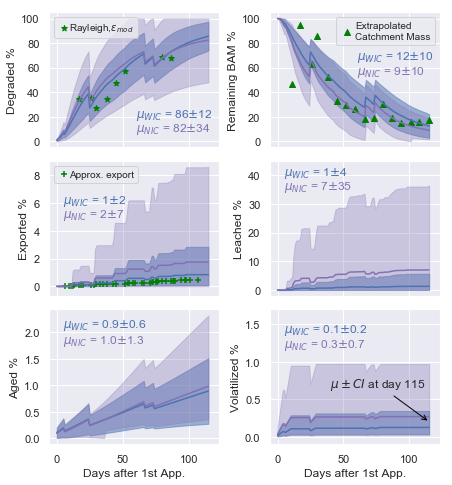

In [65]:
# sns.set(rc={'figure.figsize':(11.7, 8.27)})
# ES&T max width, 1 column = 3.25in, 2-col = 7in 
sns.set_context("paper")
sns.set(rc={'figure.figsize':(7., 7.27)}) # Width, height, inches

fig, axes = plt.subplots(3, 2, sharex=True, sharey=False)

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
ax5 = axes[2,0]
ax6 = axes[2,1]

order = ['WC', 'NC']
# Degradation
g1 = sns.lineplot(x="Jdays", y="value", data=deg_all.loc[deg_all['variable']=="DEG_50%"], 
                  hue="Type", hue_order=order, 
                  palette = ["C0", "C4"], ci=None, ax=ax1, legend=False)

ax1.fill_between(time, deg_max_wc, deg_min_wc, alpha=0.5, color="C0")
ax1.fill_between(time, deg_max_nc, deg_min_nc, alpha=0.3, color="C4")

#ax1.errorbar(days, Blab, Bmin, c= "green")
# ax1.scatter(days, Blab, c= "green", marker='.', label="$\epsilon_{lab}$")
ax1.scatter(days, Bmod, c= "green", marker='*', label="Rayleigh,$\epsilon_{mod}$")
ax1.set_ylabel("Degraded %")

ax1.annotate('$\mu_{WIC}$ = '+ str(int(round(deg_end_wc, 0))) + 
             '$\pm$' + str(int(round(deg_ci_wc,0))), xy=(60, 20), # 1.2 
                 xycoords='data', color="C0")
ax1.annotate('$\mu_{NIC}$ = '+ str(int(round(deg_end_nc, 0))) + 
             '$\pm$' + str(int(round(deg_ci_nc,0))), xy=(60, 8), # 1.2 
                 xycoords='data', color="C4")

# ax1.annotate('$\mu \pm CI$' + '\n(day 121)', xy=(1, 85), # 1.2 
#                  xycoords='data')

# Persistence
g2 = sns.lineplot(x="Jdays", y="value", data=per_all.loc[per_all['variable']=="PER_50%"], 
                  hue="Type", hue_order=order, palette = ["C0", "C4"],
                  ci=None, ax=ax2, legend=False)

ax2.fill_between(time, per_max_wc, per_min_wc, alpha=0.5, color="C0")
ax2.fill_between(time, per_max_nc, per_min_nc, alpha=0.3, color="C4")

ax2.scatter(days, Rem, c= "green", marker='^', label="Extrapolated\nCatchment Mass")
ax2.set_ylabel("Remaining BAM %")

ax2.annotate('$\mu_{WIC}$ = '+ str(int(round(per_end_wc, 0))) + 
             '$\pm$' + str(int(round(per_ci_wc,0))), xy=(60, 67), # 1.2 
                 xycoords='data', color="C0")
ax2.annotate('$\mu_{NIC}$ = '+ str(int(round(per_end_nc, 0))) + 
             '$\pm$' + str(int(round(per_ci_nc,0))), xy=(60, 55), # 1.2 
                 xycoords='data', color="C4")


# Export
g3 = sns.lineplot(x="Jdays", y="value", data=exp_all.loc[exp_all['variable']=="EXP_50%"], 
                  hue="Type", hue_order=order, palette = ["C0", "C4"],
                  ci=None, ax=ax3, legend=False)

ax3.fill_between(time, exp_max_wc, exp_min_wc, alpha=0.5, color="C0")
ax3.fill_between(time, exp_max_nc, exp_min_nc, alpha=0.3, color="C4")

ax3.scatter(days, Exp, c= "green", marker='+', label="Approx. export")
ax3.set_ylabel("Exported %")
ax3.set_xlabel("Days after 1st App.")

ax3.annotate('$\mu_{WIC}$ = '+ str(int(round(exp_end_wc, 0))) + 
             '$\pm$' + str(int(round(exp_ci_wc,0))), xy=(5, 6), # 1.2 
                 xycoords='data', color="C0")
ax3.annotate('$\mu_{NIC}$ = '+ str(int(round(exp_end_nc, 0))) + 
             '$\pm$' + str(int(round(exp_ci_nc,0))), xy=(5, 5), # 1.2 
                 xycoords='data', color="C4")

# Leaching
g4 = sns.lineplot(x="Jdays", y="value", data=lch_all.loc[lch_all['variable']=="LCH_50%"], 
                  hue="Type", hue_order=order, palette = ["C0", "C4"],
                  ci=None, ax=ax4, legend=False)

ax4.fill_between(time, lch_max_wc, lch_min_wc, alpha=0.5, color="C0")
ax4.fill_between(time, lch_max_nc, lch_min_nc, alpha=0.3, color="C4")
ax4.set_ylabel("Leached %")
ax4.set_xlabel("Days after 1st App.")
ax4.set_ylim(-2, 45)

ax4.annotate('$\mu_{WIC}$ = '+ str(int(round(lch_end_wc, 0))) + 
             '$\pm$' + str(int(round(lch_ci_wc,0))), xy=(5, 40), # 1.2 
                 xycoords='data', color="C0")
ax4.annotate('$\mu_{NIC}$ = '+ str(int(round(lch_end_nc, 0))) + 
             '$\pm$' + str(int(round(lch_ci_nc,0))), xy=(5, 35), # 1.2 
                 xycoords='data', color="C4")

# Ageing
g5 = sns.lineplot(x="Jdays", y="value", data=age_all.loc[age_all['variable']=="AGE_50%"], 
                  hue="Type", hue_order=order, palette = ["C0", "C4"],
                  ci=None, ax=ax5, legend=False)

ax5.fill_between(time, age_max_wc, age_min_wc, alpha=0.5, color="C0")
ax5.fill_between(time, age_max_nc, age_min_nc, alpha=0.3, color="C4")
ax5.set_ylabel("Aged %")
ax5.set_xlabel("Days after 1st App.")

ax5.annotate('$\mu_{WIC}$ = '+ str(round(age_end_wc, 1)) + 
             '$\pm$' + str((round(age_ci_wc,1))), xy=(5, 2.1), # 1.2 
                 xycoords='data', color="C0")
ax5.annotate('$\mu_{NIC}$ = '+ str(round(age_end_nc, 1)) + 
             '$\pm$' + str(round(age_ci_nc,1)), xy=(5, 1.8), # 1.2 
                 xycoords='data', color="C4")

# Volat
g6 = sns.lineplot(x="Jdays", y="value", data=vol_all.loc[vol_all['variable']=="VOL_50%"], 
                  hue="Type", hue_order=order, palette = ["C0", "C4"], 
                  ci=None, ax=ax6, legend=False)
ax6.fill_between(time, vol_max_wc, vol_min_wc, alpha=0.5, color="C0")
ax6.fill_between(time, vol_max_nc, vol_min_nc, alpha=0.3, color="C4")
ax6.set_ylabel("Volatilized %")
ax6.set_xlabel("Days after 1st App.")

ax6.set_ylim(-0.1, 1.7)

ax6.annotate('$\mu_{WIC}$ = '+ str(round(vol_end_wc, 1)) + 
             '$\pm$' + str((round(vol_ci_wc,1))), xy=(5, 1.4), # 1.2 
                 xycoords='data', color="C0")
ax6.annotate('$\mu_{NIC}$ = '+ str((round(vol_end_nc, 1))) + 
             '$\pm$' + str((round(vol_ci_nc,1))), xy=(5, 1.2), # 1.2 
                 xycoords='data', color="C4")

ax6.annotate('$\mu \pm CI$ at day 115', xy=(115, 0.2), xytext=(40, 0.7), 
             arrowprops={'arrowstyle': '->', 'color': 'black'},va='center')

plt.subplots_adjust(left=None, bottom=None, right=None, top=.95,
                wspace=0.3, hspace=.1)

size = 10
g1.legend(loc='upper left', prop={'size': size}, columnspacing=0.1, handletextpad=.01, handlelength=1.1) #, bbox_to_anchor=(0.7, 0.5), ncol=1)
g2.legend(loc='upper right', prop={'size': size}, columnspacing=0.1, handletextpad=.1, handlelength=1.4) #, bbox_to_anchor=(0.7, 0.5), ncol=1)
g3.legend(loc='upper left', prop={'size': size},handletextpad=.01, handlelength=1.1) #, bbox_to_anchor=(0.7, 0.5), ncol=1)

plt.show()

# fig.savefig("Fig5_Metrics.pdf")

In [24]:
vol_ci_nc

0.7019846511484296

In [25]:
35/15.
7/4.
33/10.

3.3

In [26]:
lch_all.loc[(lch_all['variable']=="LCH_50%") & (lch_all['Type']=="NC")].max()

Jdays           115
variable    LCH_50%
value       7.03175
Type             NC
dtype: object

In [27]:
lch_all.loc[(lch_all['variable']=="LCH_50%") & (lch_all['Type']=="NC")].max()

Jdays           115
variable    LCH_50%
value       7.03175
Type             NC
dtype: object

In [28]:
vol_nc = vol_all.loc[(vol_all['variable']=="VOL_50%") & (vol_all['Type']=="NC")].max()[2]
vol_wc = vol_all.loc[(vol_all['variable']=="VOL_50%") & (vol_all['Type']=="WC")].max()[2]

In [29]:
vol_nc/vol_wc

2.161256455188439

In [30]:
34.95 + 59.95 + 39.95 + 79.95 + 79.95 + 28.45

323.2